In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import umap.umap_ as umap
import warnings
warnings.filterwarnings("ignore")

In [25]:
X_train = pd.read_csv("preprocessing_data.csv")

In [26]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

## Reduce dimensionality

### PCA

In [27]:
pca = PCA(n_components=0.995, random_state=123)
X_train_pca = pca.fit_transform(X_train)

In [28]:
X_train_pca.shape

(400, 371)

In [29]:
n_cluster_range = range(2, 21)

silhouette_scores = []

for n_clusters in n_cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=50, init='k-means++')
    kmeans.fit(X_train_pca)
    
    silhouette_avg = silhouette_score(X_train_pca, kmeans.labels_, random_state=123)
    silhouette_scores.append(silhouette_avg)
    
best_n_clusters = n_cluster_range[np.argmax(silhouette_scores)]

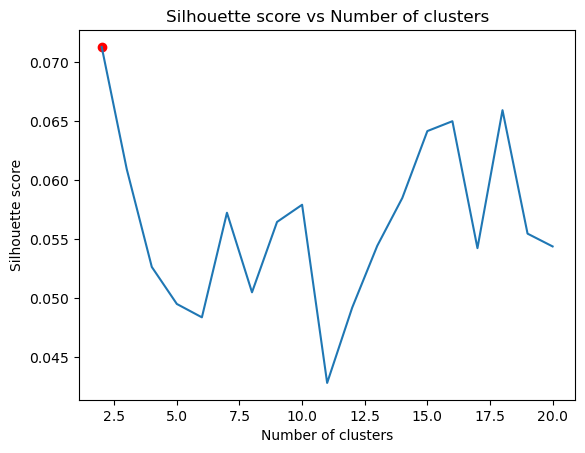

Best number of clusters: 2


In [30]:
plt.plot(n_cluster_range, silhouette_scores)
plt.scatter(best_n_clusters, max(silhouette_scores), color='red', label='Best number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.show()

print(f'Best number of clusters: {best_n_clusters}')

In [31]:
kmeans_pca = KMeans(n_clusters=best_n_clusters, random_state=123, max_iter=1000, n_init=50, init='k-means++')
kmeans_pca.fit(X_train_pca)
kmeans_labels_pca = kmeans_pca.predict(X_train_pca)

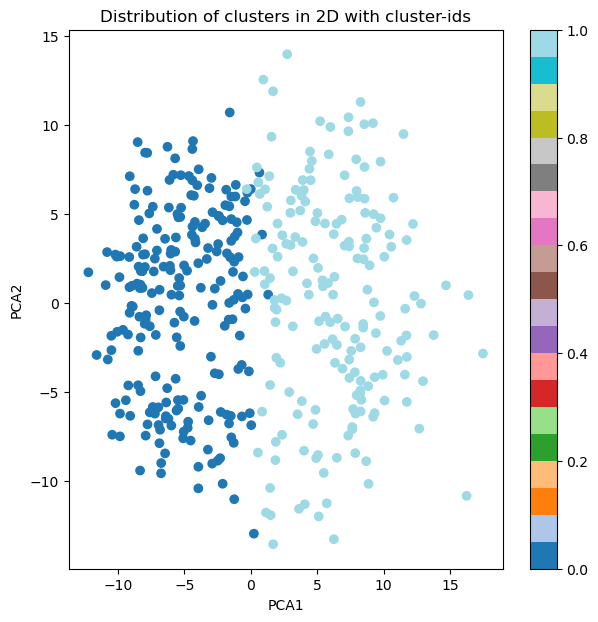

In [32]:
# Plot the distribution of clusters in 2D with their cluster-ids
plt.figure(figsize=(7, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans_labels_pca, cmap='tab20')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Distribution of clusters in 2D with cluster-ids')
plt.colorbar()
plt.show()

In [33]:
print(f'Silhouette score: {silhouette_score(X_train_pca, kmeans_labels_pca)}')
print(f'Davies Bouldin score: {davies_bouldin_score(X_train_pca, kmeans_labels_pca)}')

Silhouette score: 0.07127207064905965
Davies Bouldin score: 3.5193825360336697


Counter({0: 219, 1: 181})


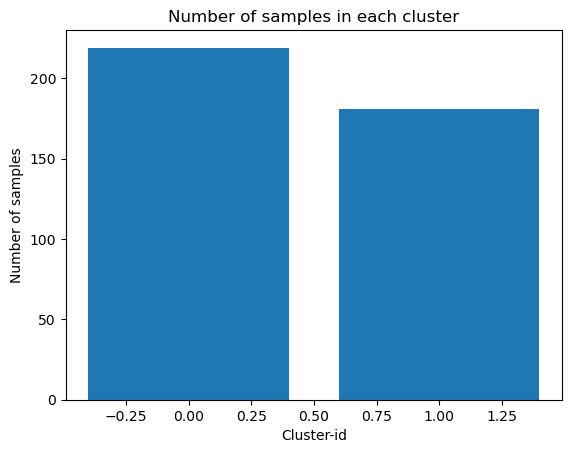

In [34]:
print(Counter(kmeans_labels_pca))

plt.bar(Counter(kmeans_labels_pca).keys(), Counter(kmeans_labels_pca).values())
plt.xlabel('Cluster-id')
plt.ylabel('Number of samples')
plt.title('Number of samples in each cluster')
plt.show()

In [52]:
umap_reducer = umap.UMAP(n_components=25, random_state=123)
X_train_umap = umap_reducer.fit_transform(X_train_pca)

In [53]:
n_cluster_range = range(2, 21)

silhouette_scores = []

for n_clusters in n_cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=50, init='k-means++')
    kmeans.fit(X_train_umap)
    
    silhouette_avg = silhouette_score(X_train_umap, kmeans.labels_, random_state=123)
    silhouette_scores.append(silhouette_avg)
    
best_n_clusters = n_cluster_range[np.argmax(silhouette_scores)]

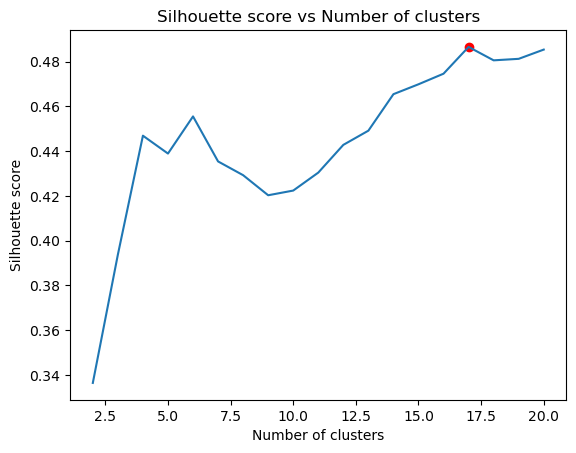

Best number of clusters: 17


In [54]:
plt.plot(n_cluster_range, silhouette_scores)
plt.scatter(best_n_clusters, max(silhouette_scores), color='red', label='Best number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.show()

print(f'Best number of clusters: {best_n_clusters}')

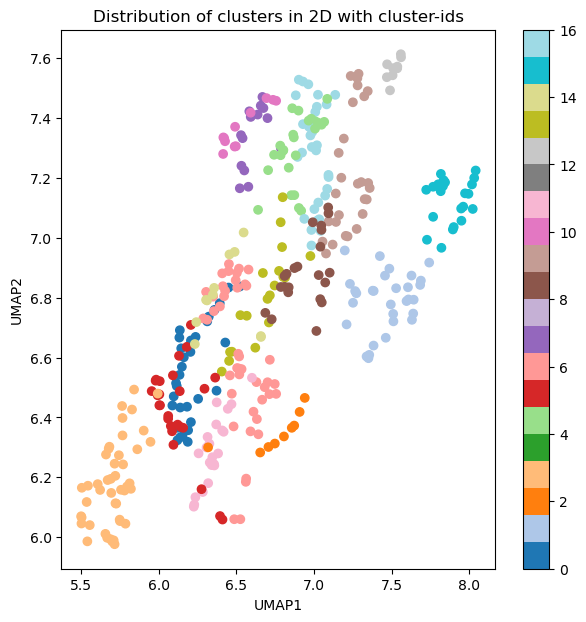

In [55]:
kmeans_umap = KMeans(n_clusters=best_n_clusters, random_state=123, max_iter=1000, n_init=50, init='k-means++')
kmeans_umap.fit(X_train_umap)
kmeans_labels_umap = kmeans_umap.predict(X_train_umap)

# Plot the distribution of clusters in 2D with their cluster-ids
plt.figure(figsize=(7, 7))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=kmeans_labels_umap, cmap='tab20')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('Distribution of clusters in 2D with cluster-ids')
plt.colorbar()
plt.show()

In [56]:
silhouette_score_train = silhouette_score(X_train_umap, kmeans_labels_umap)
davies_bouldin_score_train = davies_bouldin_score(X_train_umap, kmeans_labels_umap)

print(f'Silhouette score: {silhouette_score_train}')
print(f'Davies Bouldin score: {davies_bouldin_score_train}')

Silhouette score: 0.4866146743297577
Davies Bouldin score: 0.7481004699005451


Counter({3: 45, 6: 44, 0: 32, 16: 31, 1: 30, 9: 27, 5: 26, 4: 25, 11: 23, 15: 22, 8: 22, 13: 19, 7: 14, 10: 11, 14: 11, 2: 9, 12: 9})


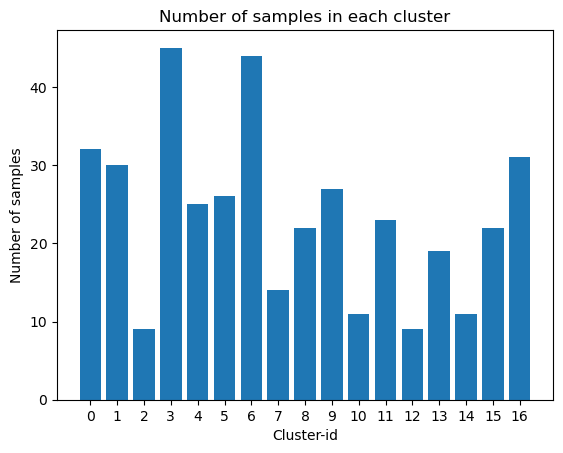

In [57]:
print(Counter(kmeans_labels_umap))

plt.bar(Counter(kmeans_labels_umap).keys(), Counter(kmeans_labels_umap).values())
plt.xlabel('Cluster-id')
plt.ylabel('Number of samples')
plt.title('Number of samples in each cluster')
plt.xticks(range(best_n_clusters))
plt.show()

In [58]:
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('umap', umap_reducer)
])

In [59]:
X_val = pd.read_csv("umist_val_for_cluster.csv")

In [60]:
X_val_transformed = pipeline.transform(X_val)

In [61]:
kmeans_labels_val = kmeans_umap.predict(X_val_transformed)
silhouette_score_val = silhouette_score(X_val_transformed, kmeans_labels_val)
davies_bouldin_score_val = davies_bouldin_score(X_val_transformed, kmeans_labels_val)
print(f'Silhouette score on validation set: {silhouette_score_val}')
print(f'Davies Bouldin score on validation set: {davies_bouldin_score_val}')

Silhouette score on validation set: 0.46656012535095215
Davies Bouldin score on validation set: 0.7379684555993077


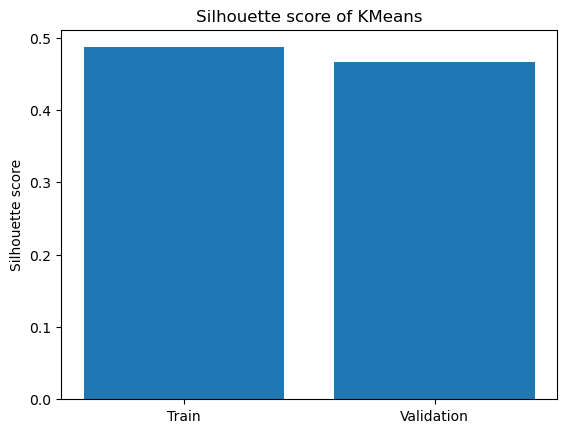

In [62]:
# plot of silhouette scores on train, validation and test sets 
plt.bar(['Train', 'Validation'], [silhouette_score_train, silhouette_score_val])
plt.ylabel('Silhouette score')
plt.title('Silhouette score of KMeans')
plt.show()

In [46]:
umist_data = pd.read_csv("umist_cropped.csv")

In [47]:
# Add the cluster labels to the umist data
umist_data['cluster_id'] = kmeans_labels_umap

# Save the data
umist_data.to_csv('umist_cropped_kmeans_clustered.csv', index=False)

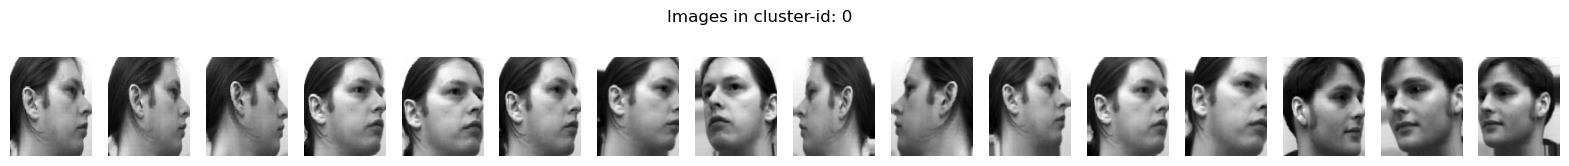

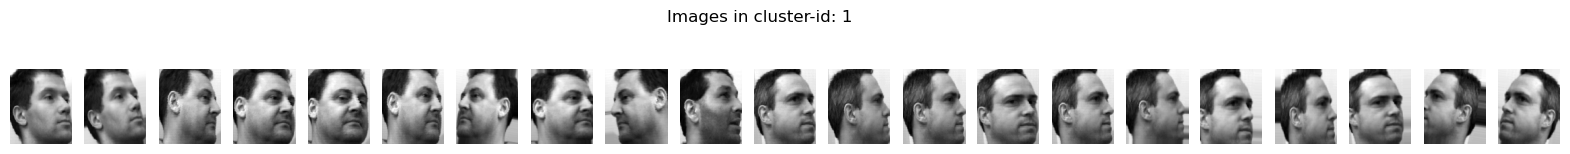

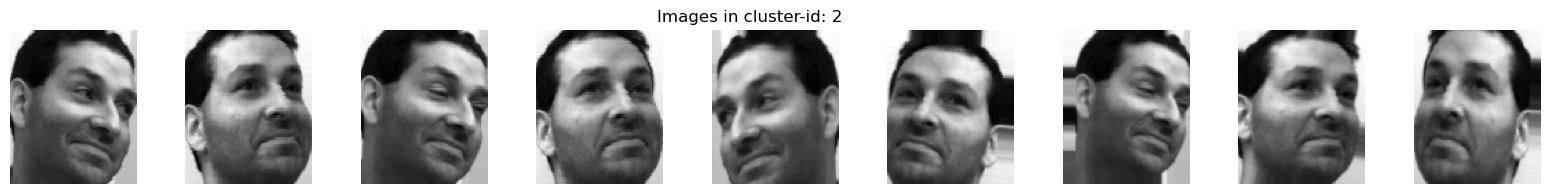

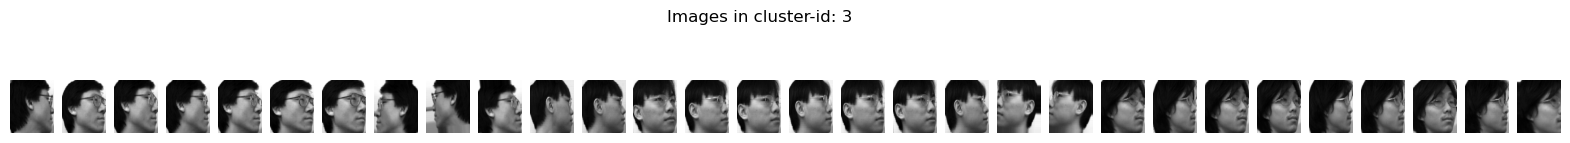

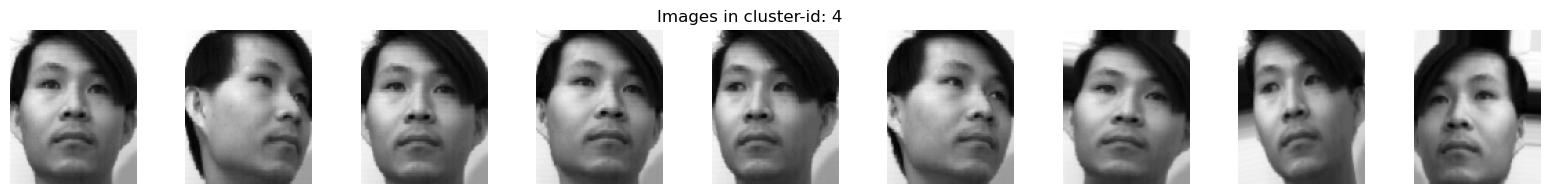

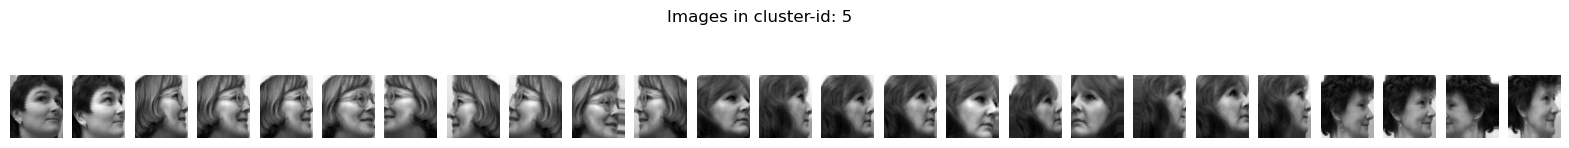

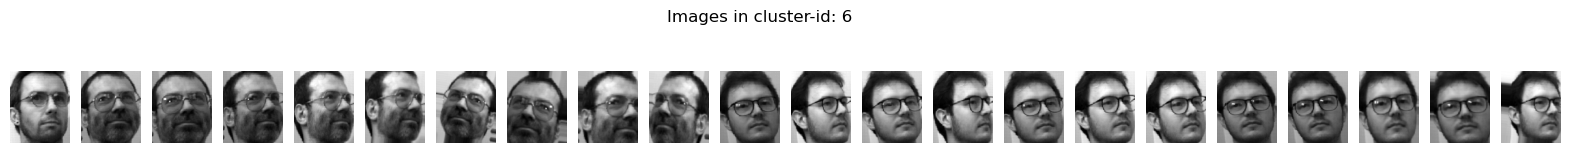

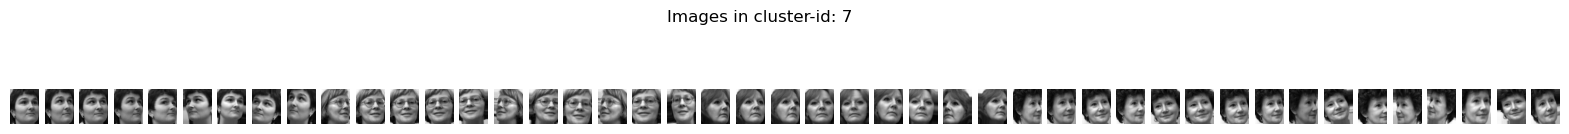

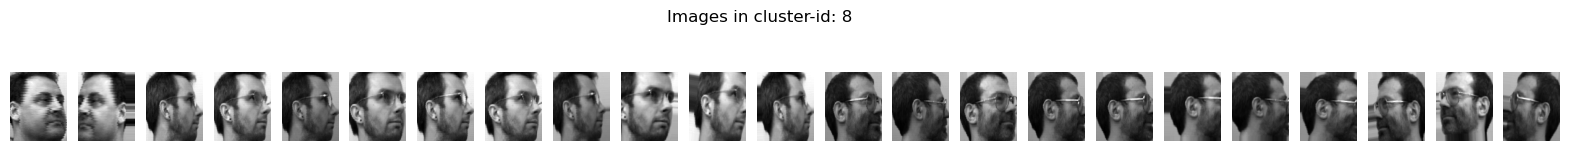

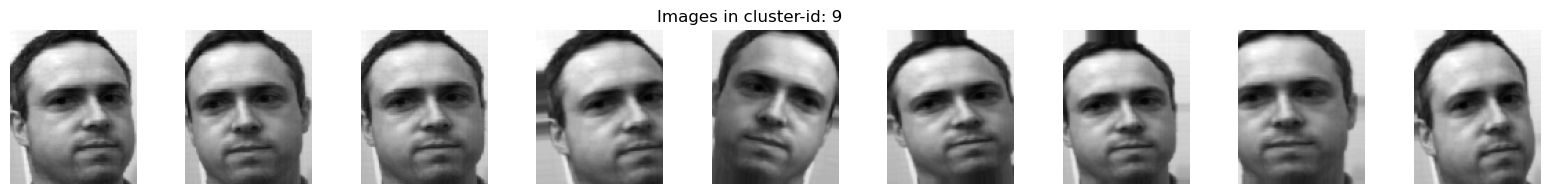

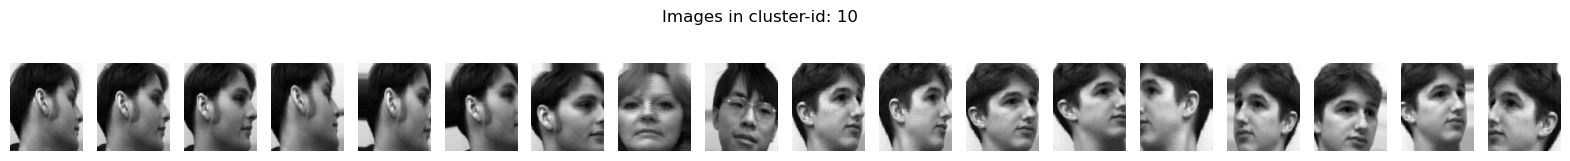

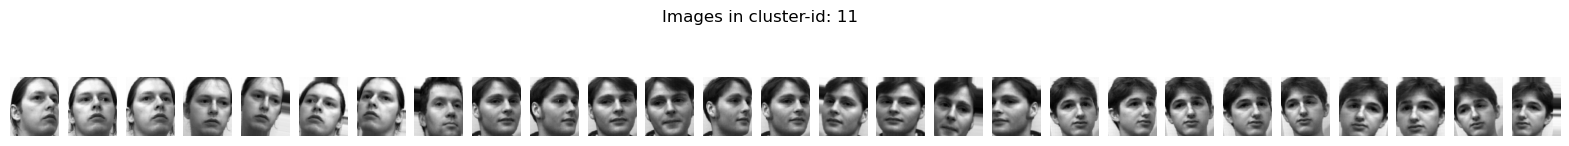

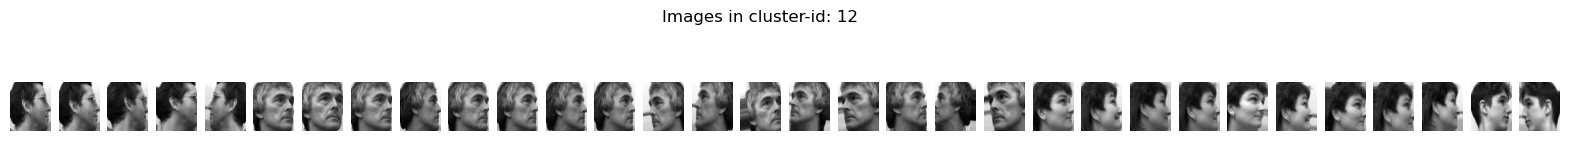

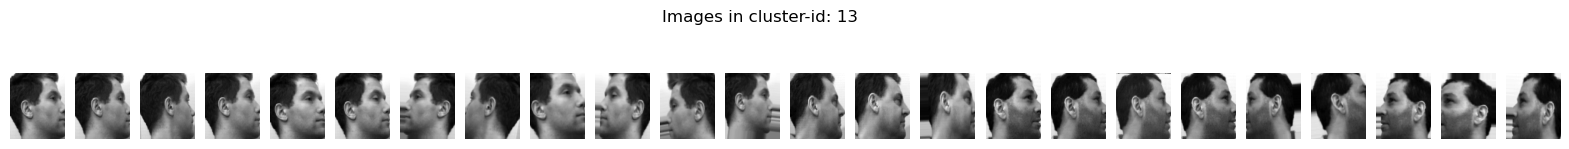

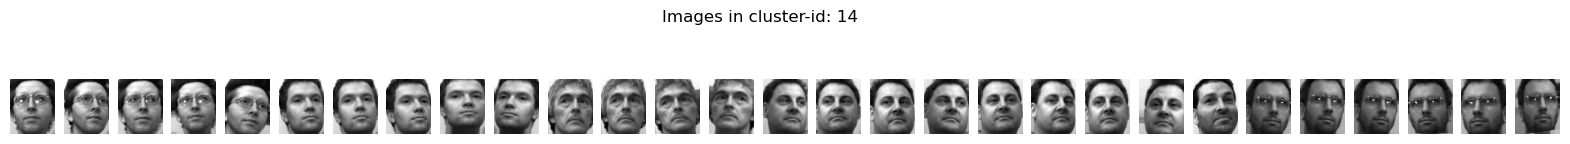

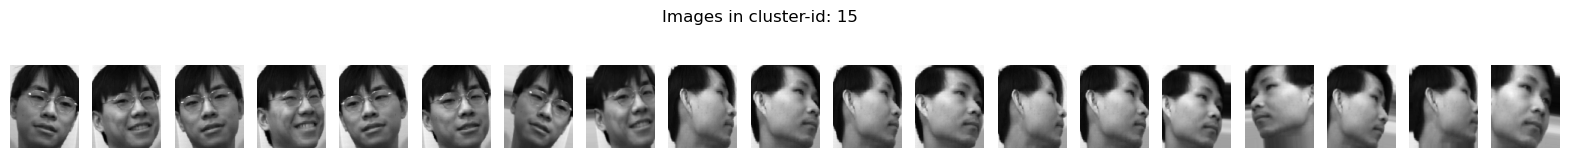

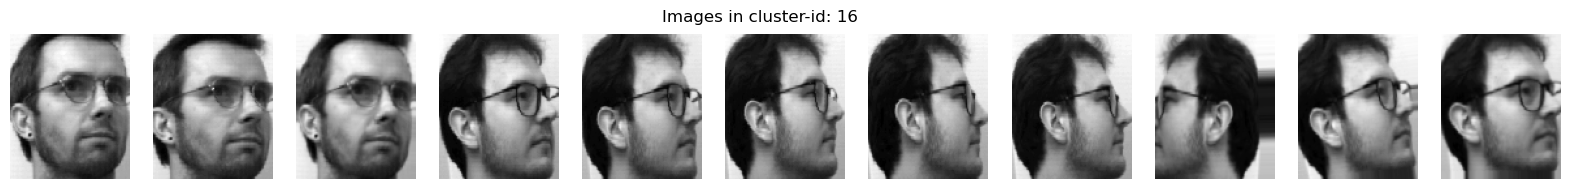

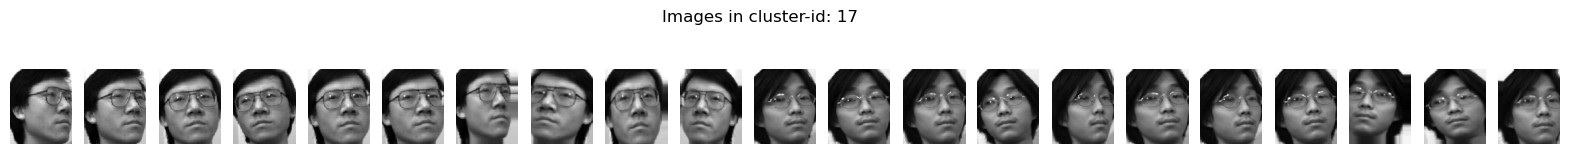

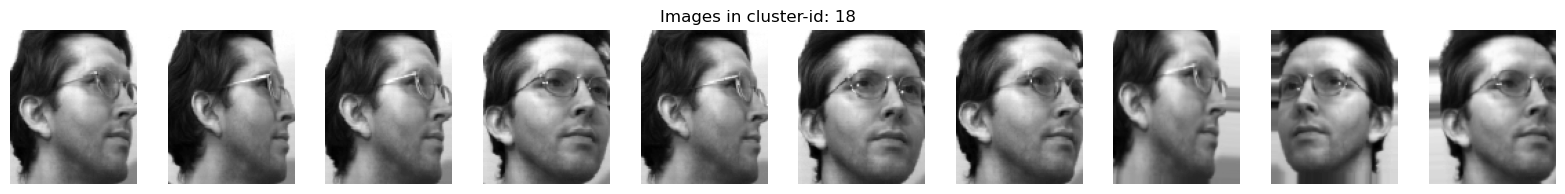

In [48]:
for cluster_id in range(best_n_clusters):
    cluster_indices = umist_data[umist_data['cluster_id'] == cluster_id].index
    
    num_images = min(max(Counter(kmeans_labels_umap).values()), len(cluster_indices))
    
    if num_images > 0:
        fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
        
        for i in range(num_images):
           image_idx = cluster_indices[i]
           image_data = umist_data.iloc[image_idx].values
           image = image_data[:-1].reshape(112, 92)
           
           if num_images == 1:
               axes.imshow(image, cmap='gray')
               axes.axis('off')
           else:
                axes[i].imshow(image, cmap='gray')
                axes[i].axis('off')
                
        plt.suptitle(f'Images in cluster-id: {cluster_id}')
        plt.show()

In [49]:
X_test_original = pd.read_csv("umist_test.csv")
X_test_preprocessed = pd.read_csv("umist_test_for_cluster.csv")

X_test_transformed = pipeline.transform(X_test_preprocessed)

In [50]:
kmeans_labels_test = kmeans_umap.predict(X_test_transformed[21].reshape(1, -1))
kmeans_labels_test

array([17])

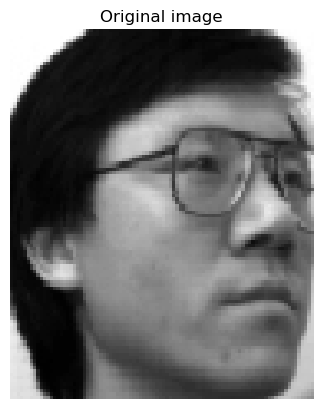

In [51]:
# Plot 1st image from X_test_original
image_data = X_test_original.iloc[21].values

# Reshape the array to the correct dimensions
image = image_data.reshape(112, 92)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original image')
plt.show()